## Online Shoppers Intention
### Problem Statement:
Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  Analyse and compare the clusters formed with the existing Revenue Column.
### Data Set Information:
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.
### Attribute Information:
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
Citation / Reference:
Please use the below link to cite this dataset:
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).
https://link.springer.com/article/10.1007/s00521-018-3523-0
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Expected Approach/Outcomes:
	Perform required cleaning to bring the uniformity in the data.
	Carry-out uni-variate, Bi-variate and Multti-varaiate analysis to understand the data relationships.
	Perform required missing value treatment
	Perform Outlier treatment if required
	Perform appropriate scaling
	Perform required encoding techniques
	Build the different cluster models.
	Analyse the optimum number of cluster using appropriate techniques.
	Make the appropriate business interpretation using the cluster centroids.
	Perform the EDA on cluster groups to understand the cluster characteristics.
	Perform PCA and apply clustering on top of it. Comment whether PCA is really helping the clustering process.  
	Also try different graphs to visualize the clusters and its characteristics. 




#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# for kmeans clustering
from sklearn.cluster import KMeans   
# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances

# to convert data into standard form
from sklearn.preprocessing import StandardScaler 

# to visualize data
import seaborn as sns 

# to plot graphs
import matplotlib.pyplot as plt  
import matplotlib.cm as cm

# to calculate silhouette_score
from sklearn.metrics import silhouette_score 
from sklearn.metrics import silhouette_samples

# filter the warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
### Reading data

In [3]:
df= pd.read_csv('online_shoppers_intention.csv')

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


* As we can see our data is labeled and target variable is Revenue.
* But for the sake of finding the hidden pattern in our data, we drop that column and do clustering analysis.
* Also, we will make use of K-Means or Hierarchical Clustering Techniques, so categorical features we will exclude as of now and only deal with numerical data.

In [4]:
# Shape of data

In [5]:
df.shape

(12330, 18)

* Data has 12330 records and 18 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Descriptive Statistics

* For Numerical Columns

In [7]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


* For Categorical Columns

In [8]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551
Weekend,12330,2,False,9462
Revenue,12330,2,False,10422


### Exploratory Data Analysis

* Missing Values Check

In [9]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

* No missing values to check

### Outliers Treatment

In [10]:
df_num =df.select_dtypes(include=np.number)

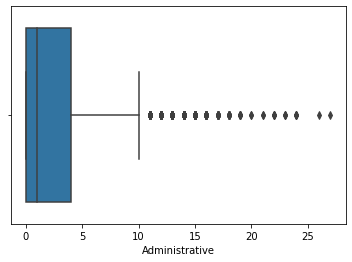

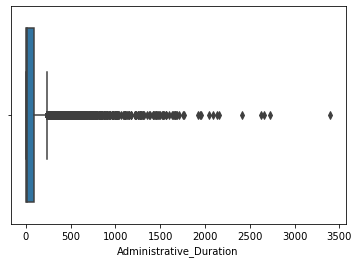

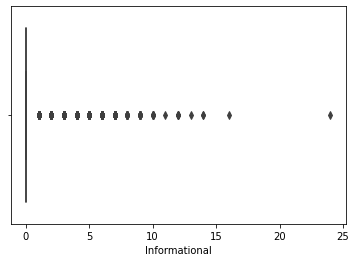

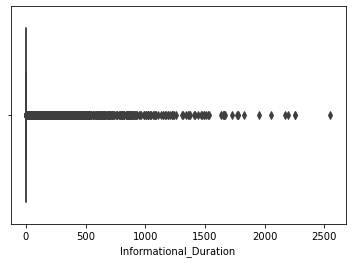

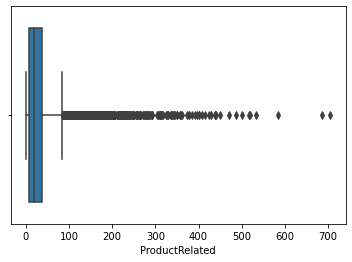

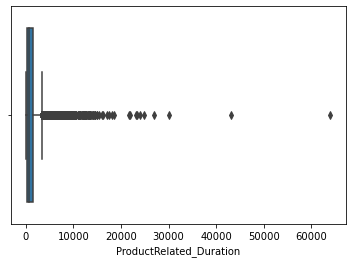

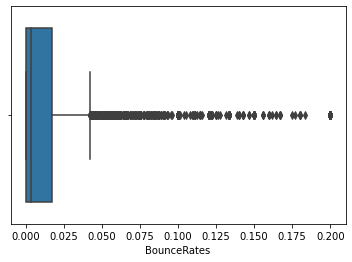

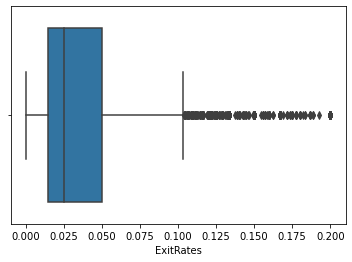

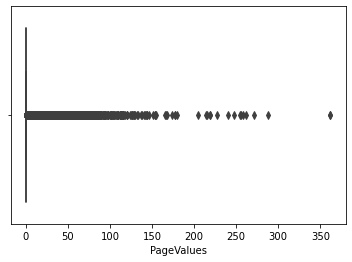

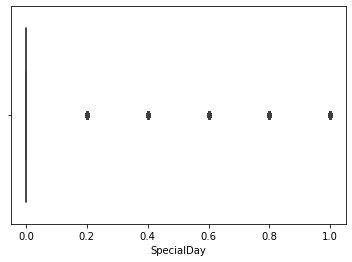

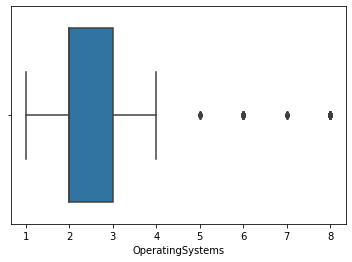

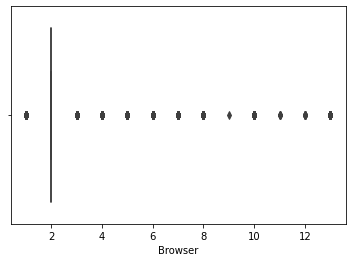

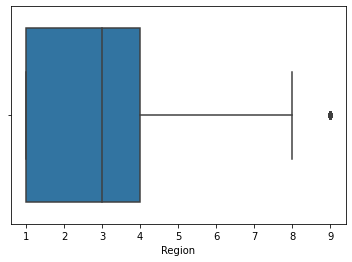

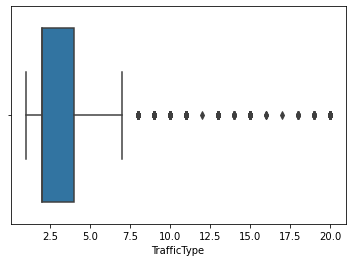

In [11]:
for col in df_num.columns:
    sns.boxplot(df_num[col],whis=1.5)
    plt.show()

* More or Less all numerical columns ahve outliers present in data.
* we try to remove these outliers using Z-Score

In [12]:
from scipy.stats import zscore

In [13]:
z = np.abs(zscore(df_num))

df_cleaned = df_num[(z<3).all(axis=1)]

df = df[df.index.isin(df_cleaned.index)]

In [14]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


* Checking Outliers 

In [15]:
df_num =df.select_dtypes(include=np.number)

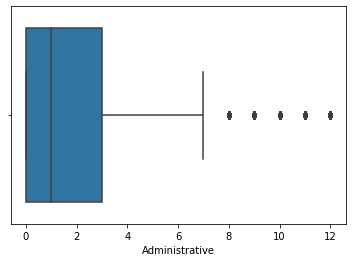

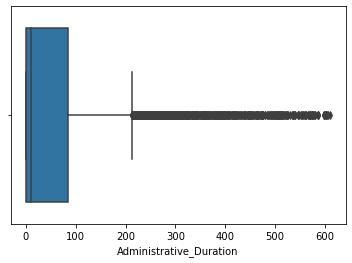

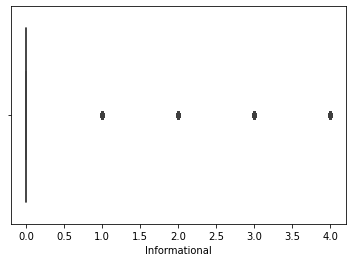

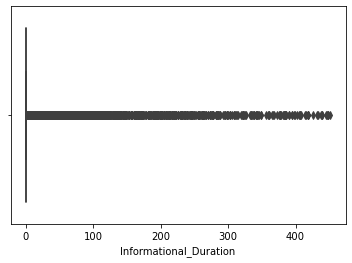

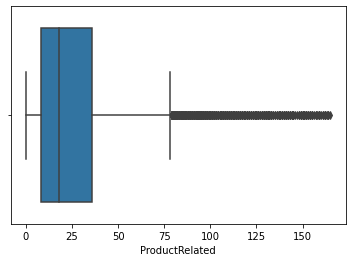

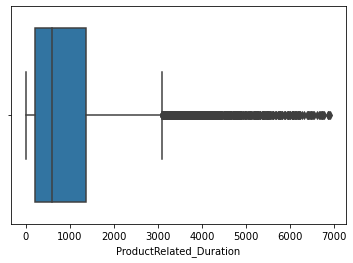

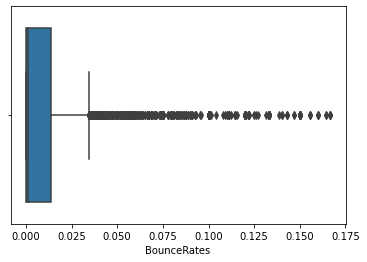

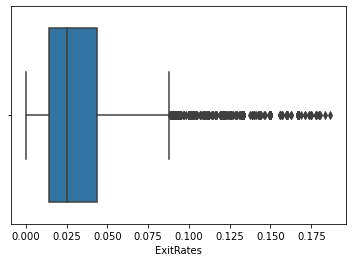

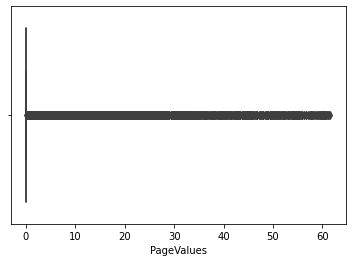

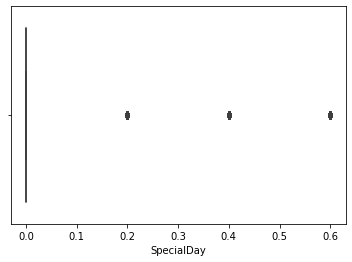

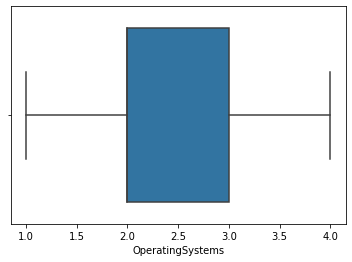

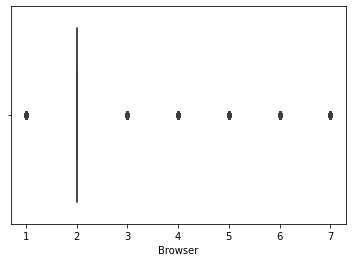

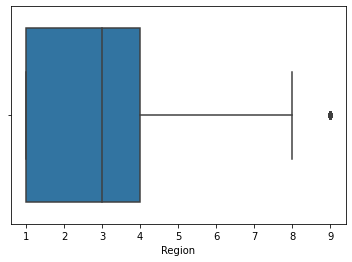

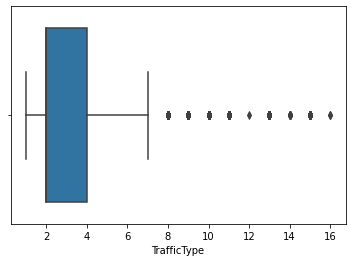

In [16]:
for col in df_num.columns:
    sns.boxplot(df_num[col],whis=1.5)
    plt.show()

In [17]:
df.shape

(9575, 18)

### Overall Relationship within Numerical Features for different Revenue

In [18]:
sns.pairplot(df,hue='Revenue')

<AxesSubplot:>

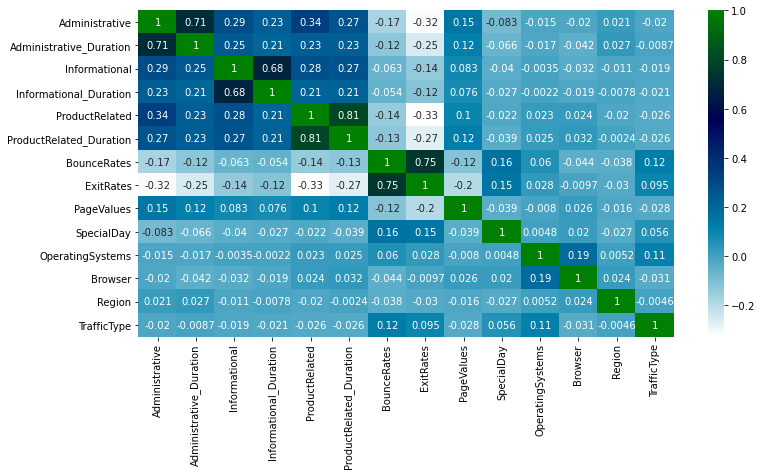

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cbar=True,cmap='ocean_r')

* From above plots we can see some strong correlation among Administrative and Administrative_duration , Informational and Informational_Duration etc.
* But apart from these 3-4 features most of the other features are not that much of correlated  to each other , which is good criteria before fitting any clustering technique.

* Checking Distribution of Numerical Columns

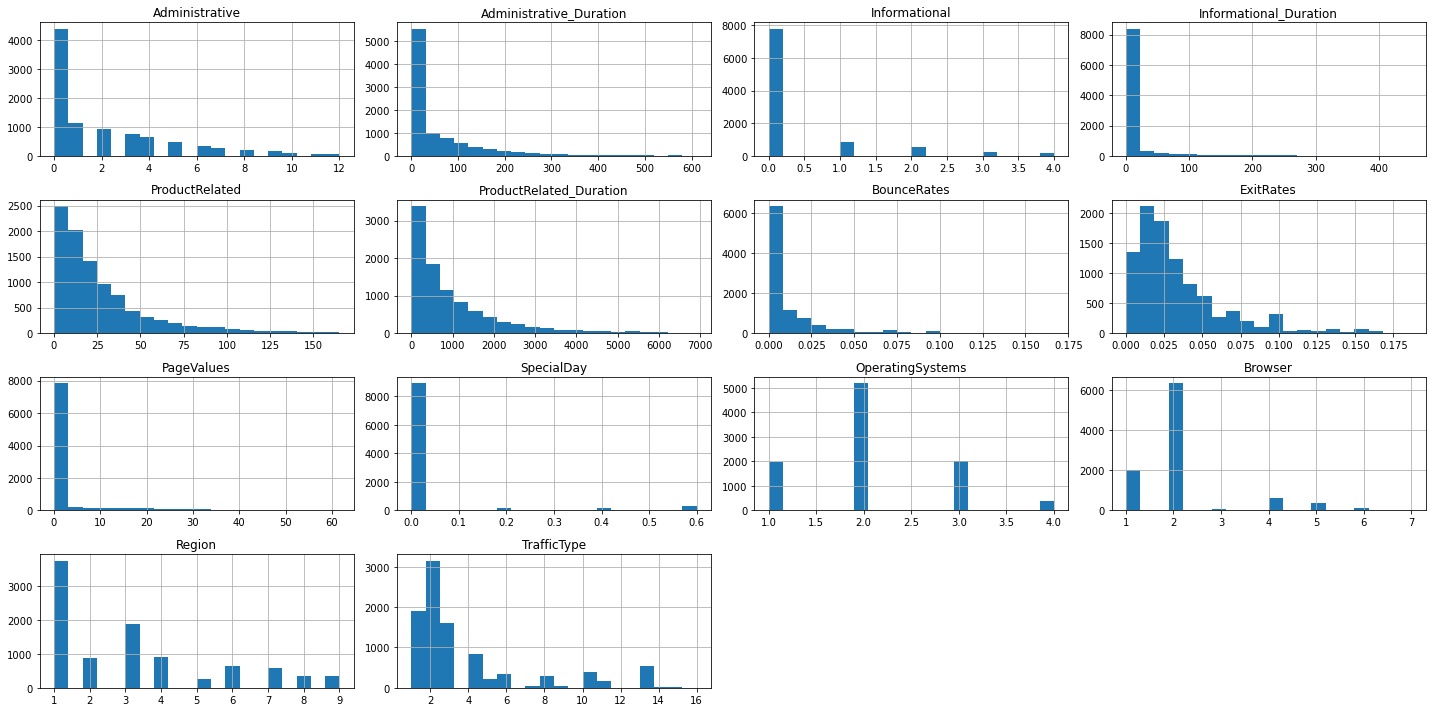

In [20]:
df.select_dtypes(include=np.number).hist(bins=20,figsize=(20,10))
plt.tight_layout()
plt.show()


In [21]:
df.skew().to_frame('Skewness')

,Skewness
Administrative,1.438807
Administrative_Duration,2.383373
Informational,2.661862
Informational_Duration,4.720922
ProductRelated,1.987524
ProductRelated_Duration,2.001563
BounceRates,3.168261
ExitRates,1.839847
PageValues,3.142228
SpecialDay,3.992196


* Most of the data is right skewed and skewness is not very high as we have already handled outliers.

* Let's first drop target column and other categorical columns prior to clustering.

In [22]:
df_cat = df.select_dtypes(exclude=np.number)

In [23]:
df_cat.columns

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [24]:
df1 = df.copy()

In [25]:
df1.drop(list(df_cat.columns),axis=1,inplace=True)

In [26]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,1,2
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,3,3,1,4
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,1,3
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,4,1,2


* Let's scale data before  performing clustering.

In [27]:
ss = StandardScaler()

In [28]:
df1_ss = ss.fit_transform(df1)

In [29]:
df1_ss = pd.DataFrame(df1_ss,columns=df1.columns)

In [30]:
df1_ss.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.755753,-0.613351,-0.4143,-0.292434,-0.905309,-0.825254,-0.532960,2.172280,-0.375941,-0.254642,-0.112284,-0.116963,-0.892231,-0.516659
1,-0.755753,-0.613351,-0.4143,-0.292434,-0.905309,-0.879234,1.768505,3.494043,-0.375941,-0.254642,1.203652,-0.116963,-0.470911,0.076259
2,-0.755753,-0.613351,-0.4143,-0.292434,-0.618342,-0.329318,0.387626,0.520076,-0.375941,-0.254642,1.203652,0.817086,-0.892231,0.076259
3,-0.755753,-0.613351,-0.4143,-0.292434,-0.295504,-0.745855,0.193818,-0.320519,-0.375941,-0.254642,-0.112284,-0.116963,-0.892231,-0.220200
4,-0.755753,-0.613351,-0.4143,-0.292434,-0.869438,-0.232067,-0.532960,-0.397815,-0.375941,3.071681,-0.112284,1.751136,-0.892231,-0.516659


In [31]:
round(df1_ss.describe())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,9575.0,9575.0,9575.0,9575.0,9575.0,9575.0,9575.0,9575.0,9575.0,9575.0,9575.0,9575.0,9575.0,9575.0
mean,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-1.0,-0.0,-0.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-0.0,-0.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,-0.0,-0.0,-1.0,-1.0
50%,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0
75%,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0
max,4.0,6.0,4.0,8.0,5.0,5.0,7.0,5.0,5.0,5.0,3.0,5.0,2.0,4.0


### K-Means Clustering

* Let's assume we have 1 to 5 number of clusters in our data.
* We tried to calculate in WCSS(within cluster sum of squares) for each of them.

In [32]:
wcss = []

for k in range(1,6):
    
    # fit K-means clustering with number of clusters K
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1_ss)
    
    # use 'inertia_' to get wcss 
    # append the value of WCSS for each K to the list 'wcss'
    wcss.append(kmeans.inertia_)

# print the within cluster sum of squares
cluster_errs= pd.DataFrame()
cluster_errs['Clusters'] = np.arange(1,6)
cluster_errs['WCSS'] = wcss

cluster_errs

,Clusters,WCSS
0,1,134050.000000
1,2,115009.565499
2,3,104067.603597
3,4,95792.490332
4,5,89691.168023


* We tried to visualize the elbow plot to get the optimal value of K(Optimal Value of Cluster in our data.)

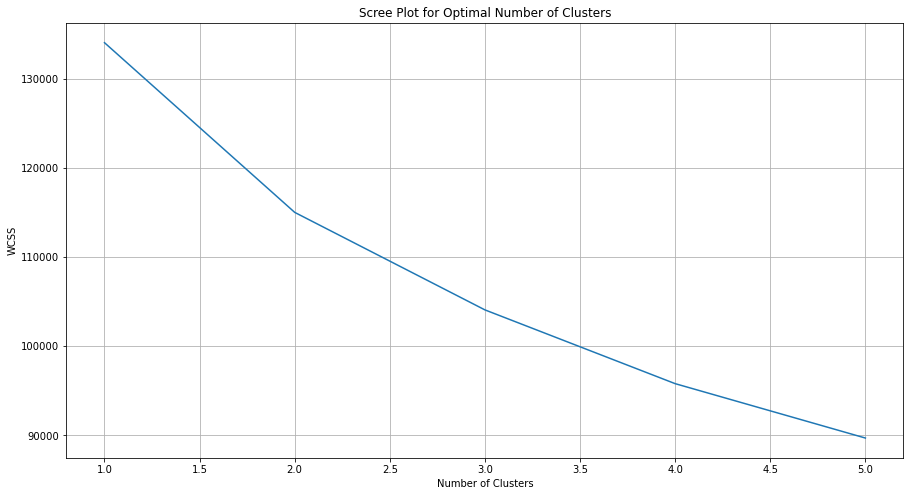

In [33]:
plt.figure(figsize=(15,8))

# plot the elbow plot
# pass the values for K and WCSS
# last number in the range() is exclusive
plt.plot(range(1,6), wcss) 

# set the axes and plot labels
plt.xlabel("Number of Clusters")
plt.title('Scree Plot for Optimal Number of Clusters')
plt.ylabel("WCSS")
plt.grid()

# display the plot
plt.show()


* We can see after 2 clusters, there is no significant drop in WCSS and an elbow can be identified in the graph.

* We tried to crosscheck the optimal number of clusters with the help of Silhouette Co-efficient.

In [34]:
silhouette_coefficients = []

for k in range(2,6):
    
    
    kmeans = KMeans(n_clusters=k, random_state=10)
    # fit and predict on the scaled data
    kmeans.fit(df1_ss)
    
    # 'silhouette_score' function computes the silhouette score for each K
    # 'random_state' returns the same sample each time you run the code  
    score = silhouette_score(df1_ss,kmeans.labels_, random_state=10)
    
    # append score to 'silhouette_coefficients'
    silhouette_coefficients.append(score)
    
# print the silhouette coefficients
silh_coeff = pd.DataFrame()

silh_coeff['Clusters'] = np.arange(2,6)
silh_coeff['Silhouette Coefficients'] = silhouette_coefficients

silh_coeff


,Clusters,Silhouette Coefficients
0,2,0.222343
1,3,0.216118
2,4,0.185914
3,5,0.198855


* We tried to plot of silhouette coefficients using appropriate graphical method to check for which cluster the silhouette score is highest.

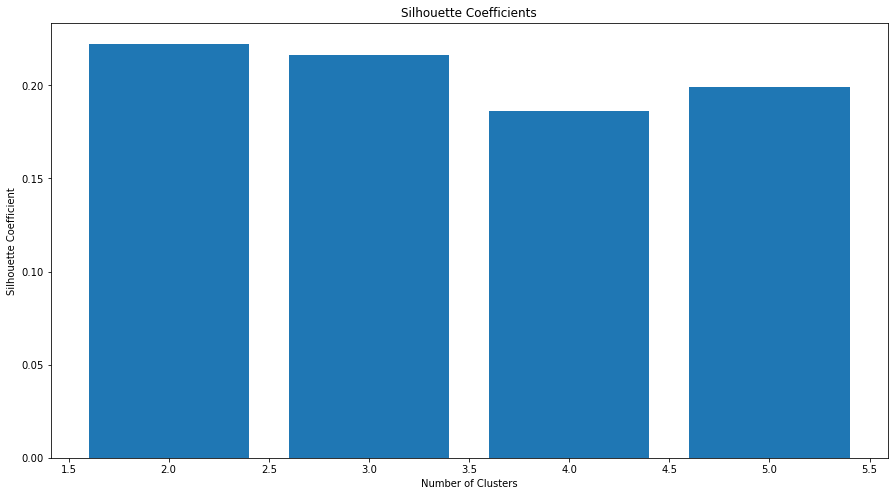

In [35]:
# set the figure size using 'figsize'
plt.figure(figsize=(15,8))

# plot bar plot of silhouette coefficients
# last number in the range() is exclusive
plt.bar(range(2,6), silhouette_coefficients)

# add axes and plot labels
plt.title('Silhouette Coefficients')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")


# display the bar plot
plt.show()


* Silhouette co-efficients suggests that, optimal number of cluster is 2.(Highest value of sillhoutte coefficient is for cluster number 2.)

### Fit K-means clustering algorithm with an optimal number of clusters( Cluster = 2)

In [36]:
Kmeans2=KMeans(n_clusters = 2, random_state = 1, max_iter = 200, tol = 0.001)

# fit the model on the scaled data
Kmeans2.fit(df1_ss)

KMeans(max_iter=200, n_clusters=2, random_state=1, tol=0.001)

In [37]:
result = Kmeans2.labels_

# create a dataframe of cluster labels
# pass the column name to the parameter 'cluster'
result = pd.DataFrame(result, columns = ["cluster"])

# group the data based on cluster labels and get size of each cluster
obs = result.groupby('cluster').size()

# print the cluster size
obs.to_frame('Cluster Size')

,Cluster Size
cluster,
0,7052
1,2523


### Appending Cluster Column in main data and visualize the data distribution between different clusters.

In [38]:
df1['Clusters'] = Kmeans2.labels_

In [39]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Clusters
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,1,2,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,3,3,1,4,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,1,3,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,4,1,2,0


In [40]:
sns.pairplot(df1,hue='Clusters')

### Comparing Cluster based distribution and Revenue based distribution of Dataset.

<AxesSubplot:>

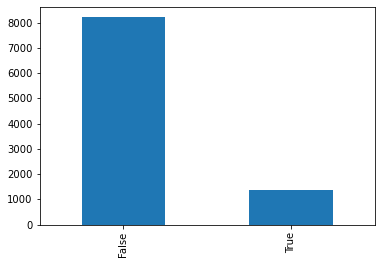

In [41]:
df.Revenue.value_counts().plot(kind='bar')

<AxesSubplot:>

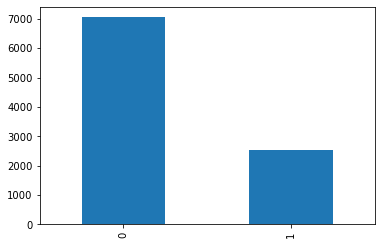

In [42]:
df1.Clusters.value_counts().plot(kind='bar')

In [43]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

#### Based on the Above Relationship plots let's segment Data with respect to Target label(Revenue) and generated Cluster label

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

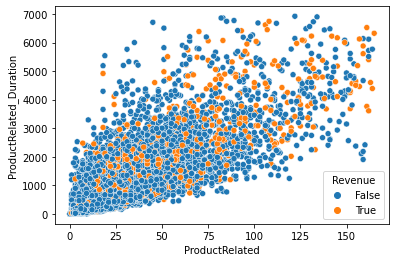

In [44]:
sns.scatterplot(x='ProductRelated',y='ProductRelated_Duration',hue='Revenue',data=df)

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

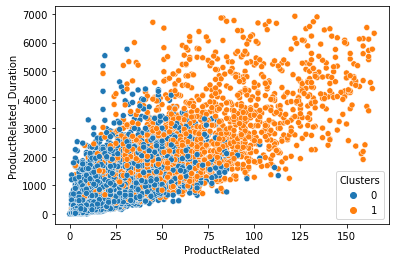

In [45]:
sns.scatterplot(x='ProductRelated',y='ProductRelated_Duration',hue='Clusters',data=df1)

<AxesSubplot:xlabel='PageValues', ylabel='Administrative_Duration'>

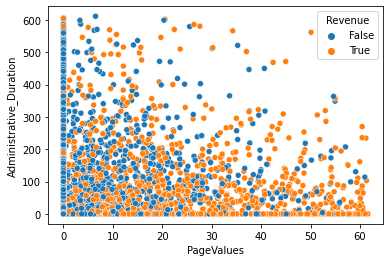

In [46]:
sns.scatterplot(x='PageValues',y='Administrative_Duration',hue='Revenue',data=df)

<AxesSubplot:xlabel='PageValues', ylabel='Administrative_Duration'>

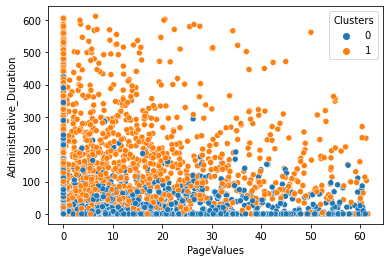

In [47]:
sns.scatterplot(x='PageValues',y='Administrative_Duration',hue='Clusters',data=df1)

<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

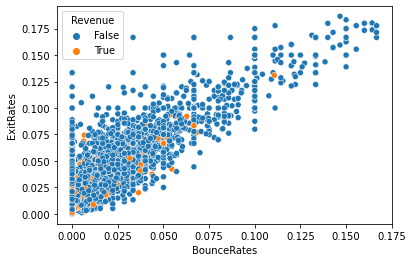

In [48]:
sns.scatterplot(x='BounceRates',y='ExitRates',hue='Revenue',data=df)

<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

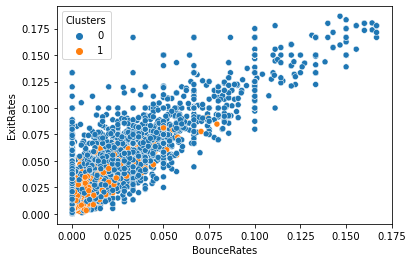

In [49]:
sns.scatterplot(x='BounceRates',y='ExitRates',hue='Clusters',data=df1)

* From above scatterplots we can get an idea how similar if not the same are the Clusters we made with existing target column.
* Though there is no direct indication that Target label  can be represented with newly introduced Cluster labels, but with the absence of target column we can get some initial idea about hidden pattern around the data.
* We can make a wild guess that Cluster 0 represents False and Cluster 1 represents True Revenue. But this pattern is not always consistent in the data.

## Hierarchical Clustering

* After Kmeans we try to perform clustering with Hierarchical Clustering.
* We will use Agglomerative to segment data.
* To identify optimal number of clusters , we will make use of Dendograms.

In [52]:
link_mat = linkage(df1_ss, method = 'ward')

In [53]:
# plot the dendrogram
# set the font size using 'figsize'
plt.figure(figsize=(15,8))

# pass the linkage matrix
dendro = dendrogram(link_mat)
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2
    
    # consider 'y' as the distance at which the merging occurs 
    y = d[1]
    
    # pass the if-condition for annotation
    if y > 15:
        
        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)
        
        # pass the conditions to annotate the distance
        plt.annotate("%.3g" % y, (x, y), xytext = (0, -5), textcoords = 'offset points', va = 'top', ha = 'center')

# set the plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
# set axes labels
# set the font size using 'fontsize'
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()



* From the above dendogram we can interpret that there are 2 visible clusters present in the data.

### Agglomerative Clustering with Number of Cluster = 2 

In [54]:
clusters = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')

# fit the model on the scaled data
clusters.fit(df1_ss)

AgglomerativeClustering()

In [55]:
df2 = df1.copy()

In [56]:
df2['Clusters_H'] = clusters.labels_

In [57]:
df2['Clusters_H'].value_counts()

0    5975
1    3600
Name: Clusters_H, dtype: int64

<AxesSubplot:>

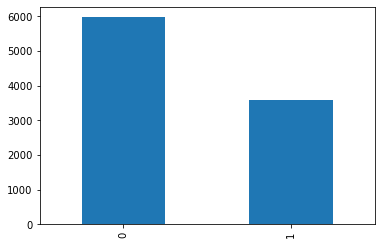

In [58]:
df2['Clusters_H'].value_counts().plot(kind='bar')

### Now let's compare Cluster segmentation of Kmeans and Hierarchical Clustering.

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

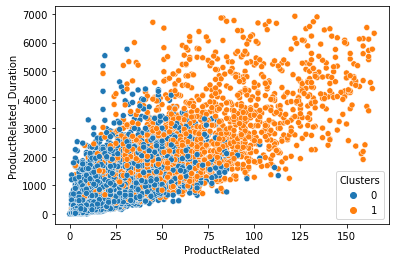

In [59]:
sns.scatterplot(x='ProductRelated',y='ProductRelated_Duration',hue='Clusters',data=df1)

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

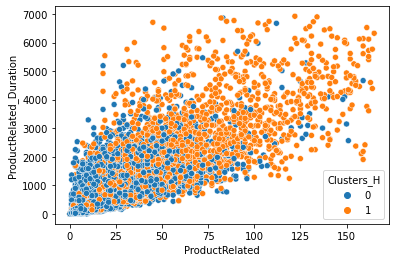

In [60]:
sns.scatterplot(x='ProductRelated',y='ProductRelated_Duration',hue='Clusters_H',data=df2)

<AxesSubplot:xlabel='PageValues', ylabel='Administrative_Duration'>

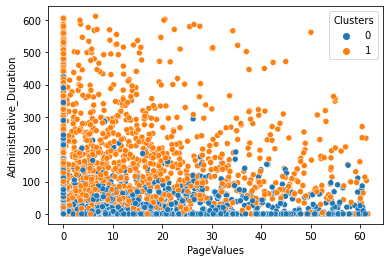

In [61]:
sns.scatterplot(x='PageValues',y='Administrative_Duration',hue='Clusters',data=df1)

<AxesSubplot:xlabel='PageValues', ylabel='Administrative_Duration'>

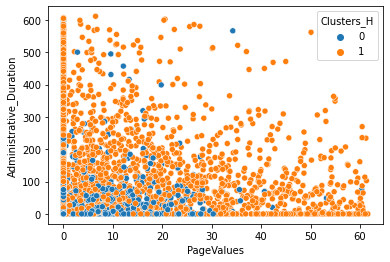

In [62]:
sns.scatterplot(x='PageValues',y='Administrative_Duration',hue='Clusters_H',data=df2)

<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

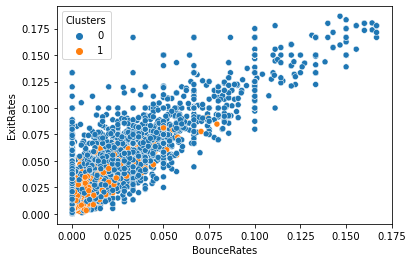

In [63]:
sns.scatterplot(x='BounceRates',y='ExitRates',hue='Clusters',data=df1)

<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

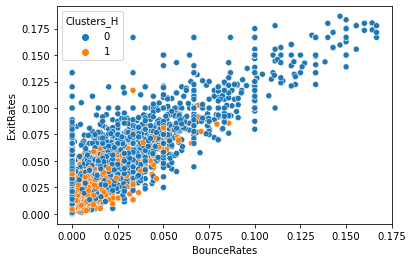

In [64]:
sns.scatterplot(x='BounceRates',y='ExitRates',hue='Clusters_H',data=df2)

* As we can see both the clustering techniques are resulting in good separation of data points and both shows kind of similar results, it is hard to interpret which one is better.
* Cluster based segmentation is quite similar in terms of distribution of data points in original data when segmented by Revenue (Target Column).

### Performing PCA prior to Clustering and checking difference in results.

* Standardizing unlabeled data.

In [65]:
df1_ss.shape

(9575, 14)

* Finding the covariance matrix of the standardized data

In [66]:
covariance_mat = np.cov(df1_ss.T)
covariance_mat[:5]

array([[ 1.00010445,  0.70885879,  0.29026782,  0.22953777,  0.33843491,
         0.27236125, -0.17101137, -0.31575921,  0.14554987, -0.08314198,
        -0.01493043, -0.02012528,  0.02052628, -0.02043465],
       [ 0.70885879,  1.00010445,  0.24890908,  0.20538829,  0.23156283,
         0.22855807, -0.1247761 , -0.2507371 ,  0.11716178, -0.06603031,
        -0.01700601, -0.04203016,  0.02699493, -0.00868829],
       [ 0.29026782,  0.24890908,  1.00010445,  0.68187725,  0.27775001,
         0.27411435, -0.06329993, -0.13608628,  0.08333834, -0.0400375 ,
        -0.00346512, -0.03230316, -0.01135671, -0.01868915],
       [ 0.22953777,  0.20538829,  0.68187725,  1.00010445,  0.20843982,
         0.21496993, -0.05382013, -0.11697709,  0.0757535 , -0.02670345,
        -0.00218035, -0.0189503 , -0.00776907, -0.02081732],
       [ 0.33843491,  0.23156283,  0.27775001,  0.20843982,  1.00010445,
         0.8073302 , -0.14376976, -0.32646857,  0.10147259, -0.02187162,
         0.02335308,  0.02

* Computing the eigenvalues and eigenvectors of the above covariance matrix.

In [67]:
eigenvalue,eigenvector = np.linalg.eig(covariance_mat)

In [68]:
eigenvalue[:5]

array([3.13927955, 1.62022226, 0.1752131 , 0.22422932, 0.29360047])

In [69]:
eigenvector[:5]

array([[-0.3907284 , -0.05580914,  0.18100635, -0.21308947,  0.64156821,
         0.20634624,  0.21580991,  0.02213909,  0.47577373, -0.05578581,
        -0.09059337, -0.07403833,  0.14669417,  0.01062645],
       [-0.34804823, -0.07450044, -0.16847977,  0.10341949, -0.61200168,
        -0.23744449,  0.27287001,  0.00685845,  0.53262797, -0.0579711 ,
        -0.10514483, -0.07630776,  0.15767014,  0.00294719],
       [-0.32473635, -0.38649301,  0.01222   ,  0.04255818, -0.24401962,
         0.6801706 ,  0.21080762,  0.0128654 , -0.30831425,  0.27429405,
        -0.02928765,  0.04127933, -0.05971799, -0.00174731],
       [-0.2891429 , -0.38297479, -0.02338859, -0.02775771,  0.21966499,
        -0.65060608,  0.23673405,  0.01806493, -0.34786767,  0.33107794,
        -0.03784627,  0.07099875, -0.05780236,  0.00774916],
       [-0.39476145, -0.10868367, -0.67893515,  0.14054862,  0.17481013,
         0.03952898, -0.44876948,  0.00716798, -0.0928125 , -0.3082098 ,
         0.03793049, -0.05

 * Using the Kaiser criterion to identify the optimal number of principal components.

In [70]:
eigenvalue[eigenvalue>1].shape

(6,)

* According to kaiser Criterian Total 6 principal components are present.

 * Drawing the scree plot and obtain the optimal number of components.

In [71]:
eigenvalue_sorted_rev = sorted(eigenvalue,reverse=True)
eigenvalue_sorted_rev[:5]

[3.1392795487508676,
 1.6202222616786845,
 1.308382667534667,
 1.1789414861457077,
 1.1492961919696325]

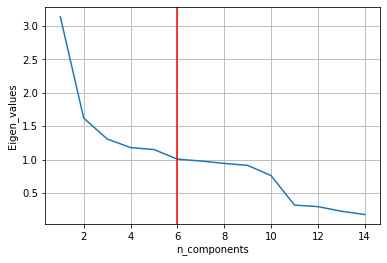

In [72]:
n = [i+1 for i in range(len(eigenvalue_sorted_rev))]
    
plt.plot(n,eigenvalue_sorted_rev)
plt.xlabel('n_components')
plt.ylabel('Eigen_values')
plt.axvline(6,color='r')
plt.grid()
plt.show()   

* We can see after 6 principal components, there is no significant drop in eigenvalues. we may consider 6 PCs.

* Let's consider 85% variation is required and see how many PCs are formed.

In [73]:
from sklearn.decomposition import PCA

In [74]:
pc=PCA(n_components=6)
df1_decomp=pc.fit_transform(df1_ss)
df1_decomp.shape

(9575, 6)

* Creating DataFrame with new PCs

In [75]:
df1_pca  = pd.DataFrame(df1_decomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6']).head()

In [76]:
df1_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.055101,0.135152,-0.504252,-0.552497,0.013391,0.495353
1,-3.205411,2.276132,0.142827,0.548235,0.323925,0.112293
2,-1.452378,0.146019,0.886861,0.026298,0.954428,0.686397
3,-1.094385,-0.521401,-0.099719,-0.602200,-0.094864,0.627749
4,-1.208020,-0.402839,1.066176,-0.508073,0.499927,1.170581


### Performing Kmeans on PCs

In [77]:
df1_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.055101,0.135152,-0.504252,-0.552497,0.013391,0.495353
1,-3.205411,2.276132,0.142827,0.548235,0.323925,0.112293
2,-1.452378,0.146019,0.886861,0.026298,0.954428,0.686397
3,-1.094385,-0.521401,-0.099719,-0.602200,-0.094864,0.627749
4,-1.208020,-0.402839,1.066176,-0.508073,0.499927,1.170581


In [78]:
scaler = StandardScaler()

In [79]:
df1_pca_ss = scaler.fit_transform(df1_pca)

In [80]:
df1_pca_ss =pd.DataFrame(df1_pca_ss,columns=df1_pca.columns)

In [81]:
wcss = []

for k in range(1,6):
    
    # fit K-means clustering with number of clusters K
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1_pca_ss)
    
    # use 'inertia_' to get wcss 
    # append the value of WCSS for each K to the list 'wcss'
    wcss.append(kmeans.inertia_)



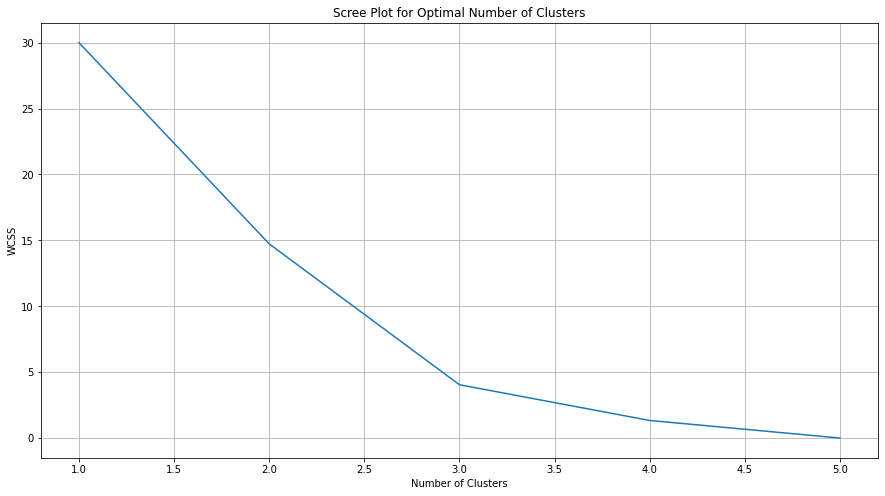

In [82]:
plt.figure(figsize=(15,8))

# plot the elbow plot
# pass the values for K and WCSS
# last number in the range() is exclusive
plt.plot(range(1,6), wcss) 

# set the axes and plot labels
plt.xlabel("Number of Clusters")
plt.title('Scree Plot for Optimal Number of Clusters')
plt.ylabel("WCSS")
plt.grid()
# display the plot
plt.show()

* ELbow plot suggests that there are 3 clusters present in the data. Let's crosscheck with silhouette Score.

In [83]:
silhouette_coefficients = []

# use 'for' loop to build the clusters
# pass the range to iterate the value of k
# last number in the range() is exclusive
for k in range(2,5):
    
    # perform K-means with different K values
    kmeans = KMeans(n_clusters=k, random_state=10)
    # fit and predict on the scaled data
    kmeans.fit(df1_pca_ss)
    
    # 'silhouette_score' function computes the silhouette score for each K
    # 'random_state' returns the same sample each time you run the code  
    score = silhouette_score(df1_pca_ss,kmeans.labels_, random_state=10)
    
    # append score to 'silhouette_coefficients'
    silhouette_coefficients.append(score)

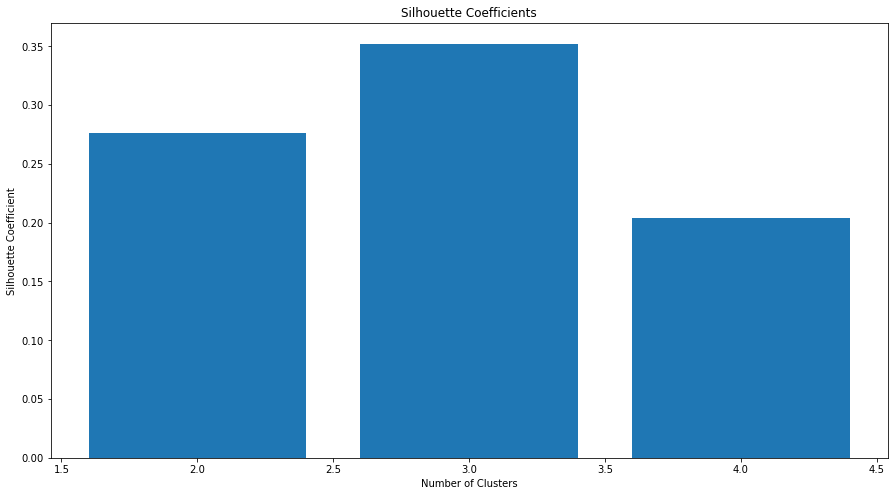

In [84]:


# set the figure size using 'figsize'
plt.figure(figsize=(15,8))

# plot bar plot of silhouette coefficients
# last number in the range() is exclusive
plt.bar(range(2,5), silhouette_coefficients)

# add axes and plot labels
plt.title('Silhouette Coefficients')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")

# display the bar plot
plt.show()


* Silhouette coeffiecient also indiactes presnece of 3 clusters.
* Let's perform Kmeans with 3 clusters.

In [85]:
Kmeans3=KMeans(n_clusters = 3, random_state = 15, max_iter = 200, tol = 0.001)

# fit the model on the scaled data
Kmeans3.fit(df1_pca_ss)


KMeans(max_iter=200, n_clusters=3, random_state=15, tol=0.001)

In [86]:
df1_pca['Cluster_PC'] = Kmeans3.labels_

In [87]:
df1_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Cluster_PC
0,-2.055101,0.135152,-0.504252,-0.552497,0.013391,0.495353,0
1,-3.205411,2.276132,0.142827,0.548235,0.323925,0.112293,2
2,-1.452378,0.146019,0.886861,0.026298,0.954428,0.686397,1
3,-1.094385,-0.521401,-0.099719,-0.602200,-0.094864,0.627749,0
4,-1.208020,-0.402839,1.066176,-0.508073,0.499927,1.170581,1


* Now let's check few distributions among PCs segmented by Clusters.

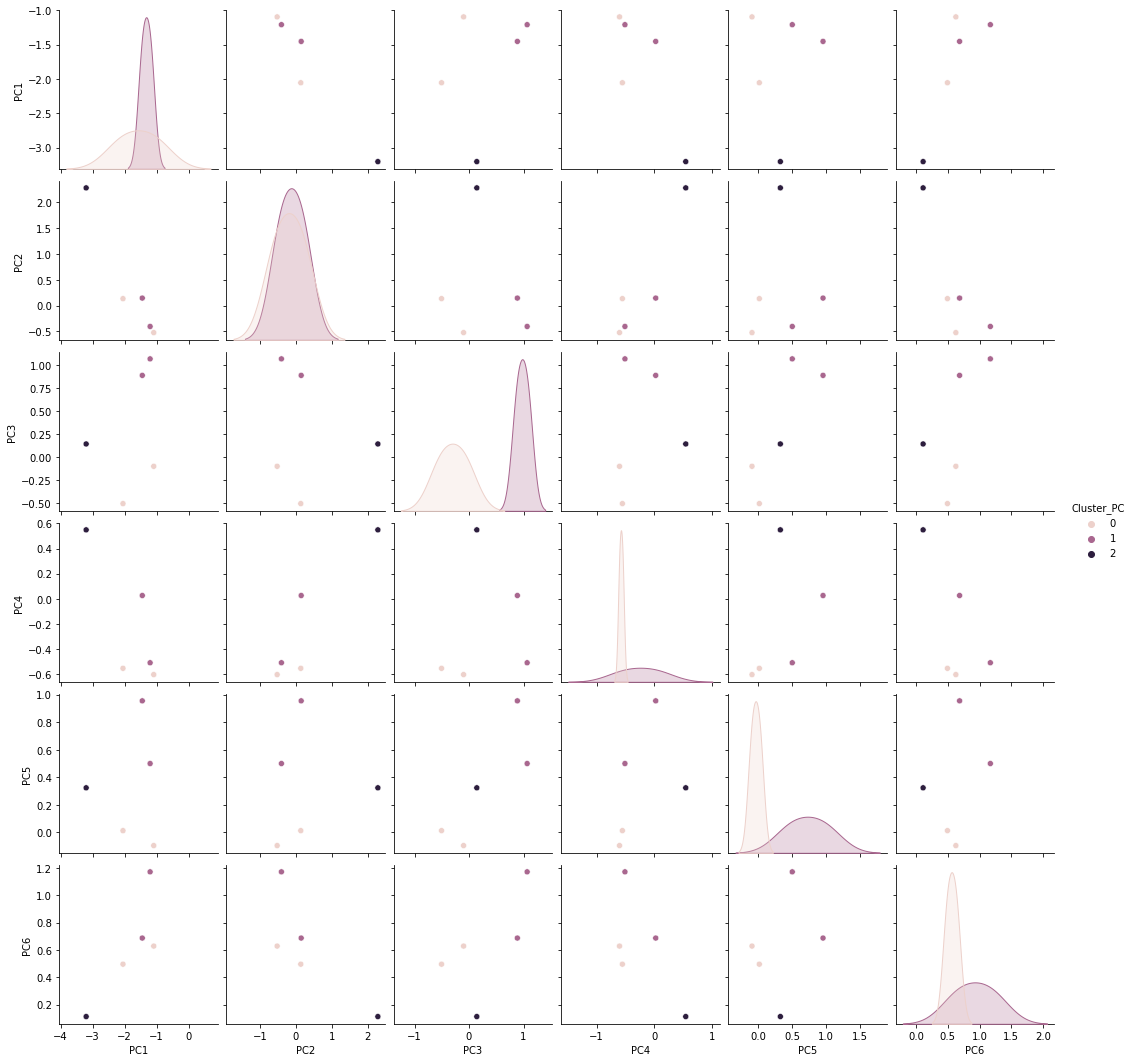

In [88]:
sns.pairplot(df1_pca,hue='Cluster_PC')

* It is quite clear that clustering on Principal Components give more better results compared to Original Data.